# Exploratory data analysis of the UC Irvine Wine Quality data set

## Problem identification on data provided

The dataset specifies the quality of wine, given a list of attributes. The attributes are fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and type (0 for red wine, 1 for white wine).These attributes are marked as features for the dataset, and combined with theses features, we can create a label for each data record, and come out the quality of the wine which is a score ranging from 0 to 10. 

Provided by those features and label, and we can create a supervised machine learning model to predict the quality of wine for unseen data where the quality is not indicated. 

## Data distribution for various quality score provided 

| Wine Quality Score | Counts |
| -----------: | --------------: |
|          3 |             30 |
|          4 |             216 |
|          5 |             2138 |
|          6 |             2836 |
|          7 |             1079 |
|          8 |             193 |
|          9 |             5 |

## Read the Data

In [1]:
import pandas as pd

white_df = pd.read_csv("data/winequality-white.csv")
red_df = pd.read_csv("data/winequality-red.csv")

red_df['color']='red'
white_df['color']='white'
wine = pd.concat([red_df,white_df]).reset_index().drop(columns = ['index'])

## Exploratory Data Analysis (EDA)

Exploratory data analysis is the process of exploring your
data, and it typically includes examining the structure and
components of your dataset, the distributions of individual
variables, and the relationships between two or more
variables [1].

### Summary of the Features

Below tables show the summarized information about the feature columns. Accordingly there is no missing value in the data set, and each column has 6497 entries. We can see that we have numeric columns except one column that has binary categories for red or white wine. The following table indicates counts, minimum, maximum, mean, quartile information of the data for each numerical feature. 

In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
import altair as alt
# Handle large data sets by not embedding them in the notebook
alt.data_transformers.enable('data_server')

# Save a PNG blob as a backup for when the Altair plots do not render
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Data analysis

We are trying to seek the relationship between each of numeric features and how the data is distributed for each feature. When we look at the distribution of the data within a single feature, and it indicates that:

- wine quality is approximately normally distributed
- fixed acidity have some outliers and peaks between 6 and 7 in wine quality score
- the pH is normally distributed
- volatile acidity has quite a few outliers with high values, also slightly skewed to the right
- most of the wines have citric acid within the range of 0.25-0.30 with few other spikes at 0.01 and 0.48
- high residual sugar has many outliers and the distribution is skewed right
- chloride distribution is skewed right with many outliers with high chlorides
- distribution of free sulfur dioxide is skewed right for its distribution

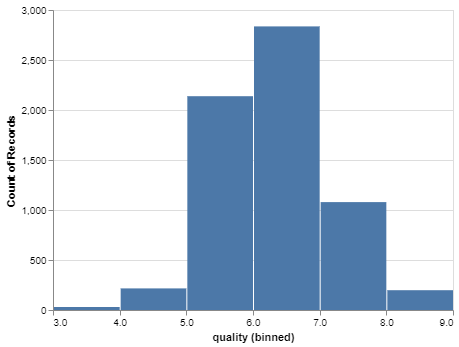

In [5]:
alt.Chart(wine).mark_bar().encode(
    x=alt.X('quality', bin=alt.Bin(maxbins=7)),
    y='count()',
    tooltip='count()')

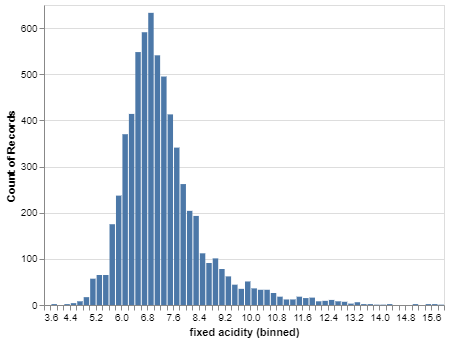

In [6]:
alt.Chart(wine).mark_bar().encode(
    x=alt.X('fixed acidity', bin=alt.Bin(maxbins=100)),
    y='count()',
    tooltip='count()')

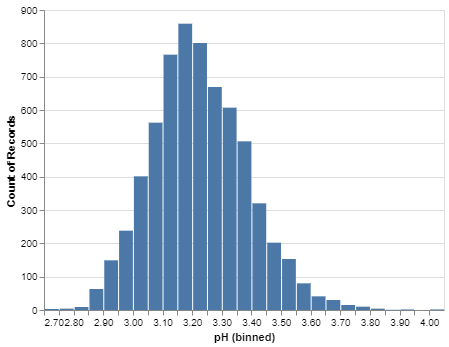

In [7]:
alt.Chart(wine).mark_bar().encode(
    x=alt.X('pH', bin=alt.Bin(maxbins=50)),
    y='count()',
    tooltip='count()')

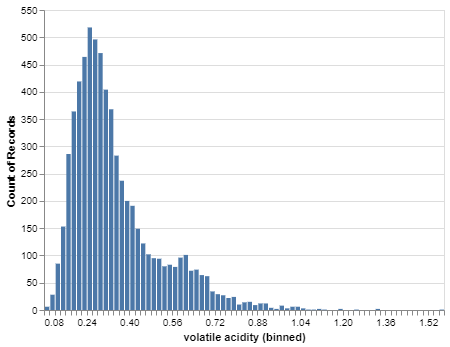

In [8]:
alt.Chart(wine).mark_bar().encode(
    x=alt.X('volatile acidity', bin=alt.Bin(maxbins=80)),
    y='count()',
    tooltip='count()')

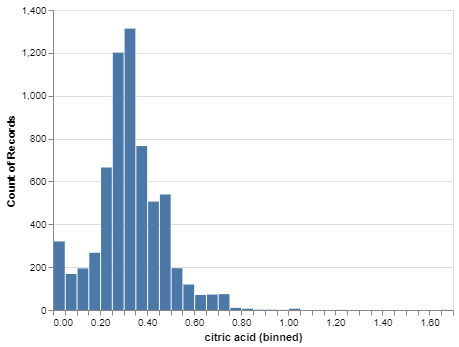

In [9]:
alt.Chart(wine).mark_bar().encode(
    x=alt.X('citric acid', bin=alt.Bin(maxbins=50)),
    y='count()',
    tooltip='count()')

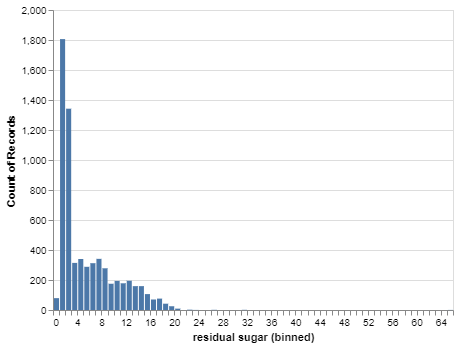

In [10]:
alt.Chart(wine).mark_bar().encode(
    x=alt.X('residual sugar', bin=alt.Bin(maxbins=100)),
    y='count()',
    tooltip='count()')

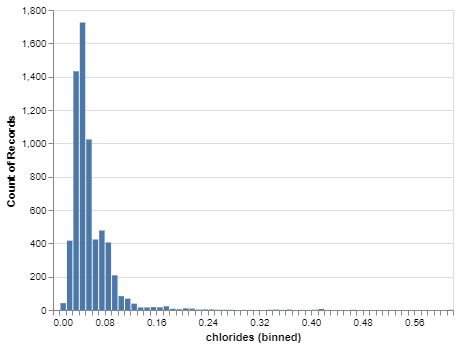

In [11]:
alt.Chart(wine).mark_bar().encode(
    x=alt.X('chlorides', bin=alt.Bin(maxbins=100)),
    y='count()',
    tooltip='count()')

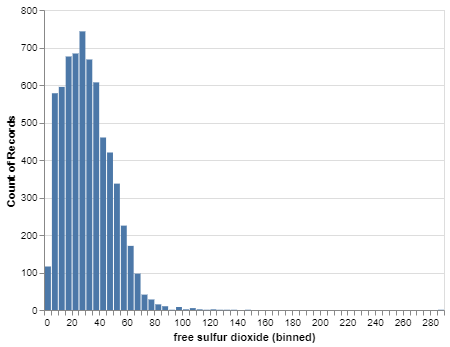

In [12]:
alt.Chart(wine).mark_bar().encode(
    x=alt.X('free sulfur dioxide', bin=alt.Bin(maxbins=100)),
    y='count()',
    tooltip='count()')

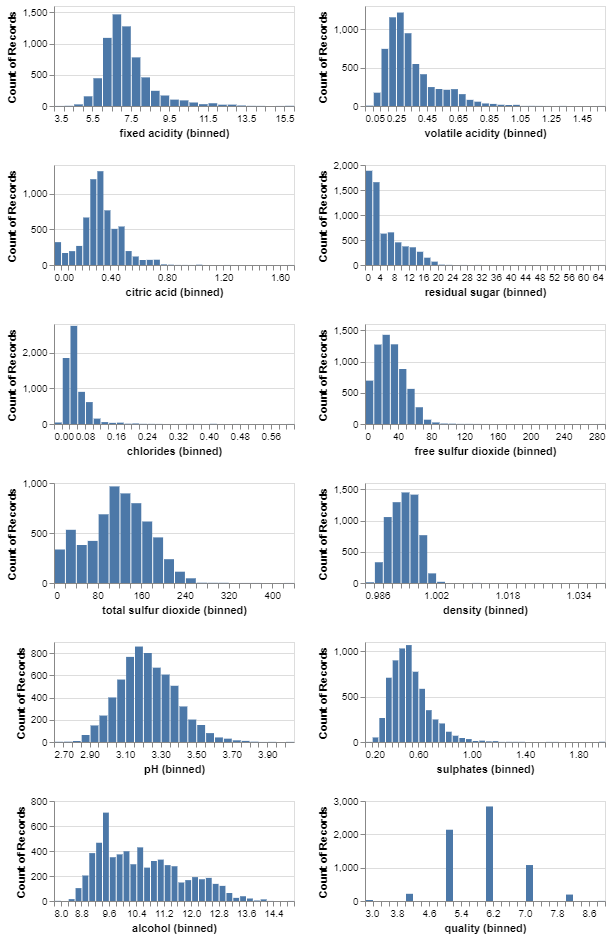

In [13]:
numeric_cols = wine.select_dtypes('number').columns.tolist()  # SOLUTION
numeric_cols_hists = (alt.Chart(wine).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    y='count()')
 .properties(height=100, width=240)
 .repeat(repeat=numeric_cols, columns=2))

numeric_cols_hists

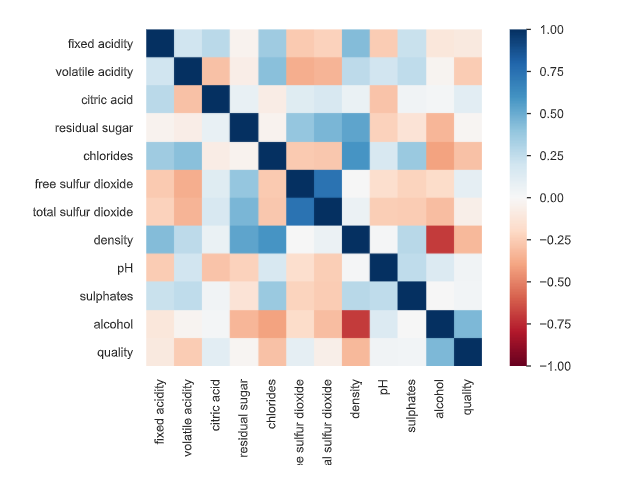

# Reference
[1] [Art of Data Science] (https://leanpub.com/artofdatascience) by Roger Peng & Elizabeth Matsui